<a href="https://colab.research.google.com/github/apurvakumbhar/ANN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 - 50s - 66ms/step - accuracy: 0.9517 - loss: 0.1594 - val_accuracy: 0.9750 - val_loss: 0.0804
Epoch 2/5
750/750 - 79s - 105ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9841 - val_loss: 0.0547
Epoch 3/5
750/750 - 83s - 111ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9871 - val_loss: 0.0432
Epoch 4/5
750/750 - 43s - 57ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9875 - val_loss: 0.0411
Epoch 5/5
750/750 - 84s - 112ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9870 - val_loss: 0.0504
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9846 - loss: 0.0491
Final Test Accuracy: 98.77%


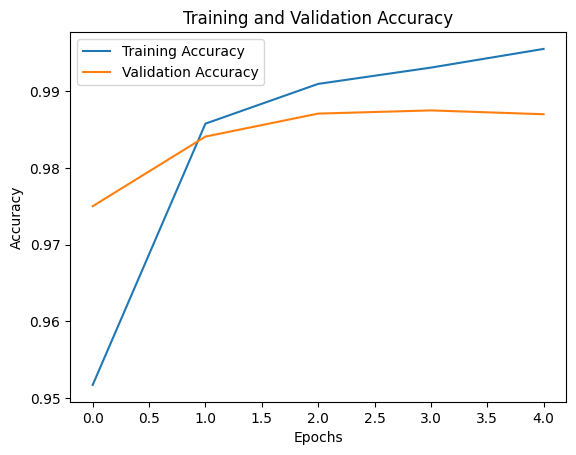

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data: Reshape and normalize
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))  # Reshape to 28x28x1
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))    # Reshape to 28x28x1
x_train, x_test = x_train / 255.0, x_test / 255.0        # Normalize the images

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build a simplified CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Final Test Accuracy: {test_acc * 100:.2f}%')

# Plot training and validation accuracy for visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
